In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
#pip install jupyter_contrib_nbextensions
#jupyter contrib nbextension install --user
#jupyter nbextension enable hinterland/hinterland

In [3]:
dataset = pd.read_csv("/Users/Datasets/Electric_Vehicle_Population_Data.csv")

In [4]:
dataset.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


# Exploratory Data Analysis

-----> Treat Missing Values

In [5]:
dataset.isna().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      32
Electric Utility                                     469
2020 Census Tract                                      2
dtype: int64

In [6]:
dataset["Legislative District"]= dataset["Legislative District"].fillna(0)
nanDropped = dataset.dropna()
nanDropped.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [7]:
nanDropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121378 entries, 1 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121378 non-null  object 
 1   County                                             121378 non-null  object 
 2   City                                               121378 non-null  object 
 3   State                                              121378 non-null  object 
 4   Postal Code                                        121378 non-null  float64
 5   Model Year                                         121378 non-null  int64  
 6   Make                                               121378 non-null  object 
 7   Model                                              121378 non-null  object 
 8   Electric Vehicle Type                              121378 non-null  object

In [8]:
nanDropped.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,121378.000000,121378.000000,121378.000000,121378.000000,121378.000000,1.213780e+05,1.213780e+05
mean,98258.220888,2019.307634,81.363600,1629.042784,29.750457,2.029314e+08,5.303961e+10
std,302.572006,2.955251,100.898888,10271.240101,14.736143,8.984293e+07,1.618062e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.523245e+08,5.303301e+10
50%,98121.000000,2020.000000,25.000000,0.000000,34.000000,1.967240e+08,5.303303e+10
75%,98370.000000,2022.000000,200.000000,0.000000,43.000000,2.258257e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [9]:
nanDropped.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
5,1N4AZ0CP1F,Thurston,Olympia,WA,98502.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,22.0,226741833,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
6,1G1RH6E48D,Thurston,Tenino,WA,98589.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,183558777,POINT (-122.85135 46.85752),PUGET SOUND ENERGY INC,5.306701e+10
7,5YJSA1E13G,Snohomish,Bothell,WA,98021.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,1.0,135989157,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [10]:
nanDropped.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [11]:
uniqueVariable = []
for i in nanDropped.columns:
    column1 = nanDropped[i].unique()
    uniqueVariable.append(column1)
    #print(uniqueVariable)
    lenUnique = len(column1)
    #uniqueVariable.append(lenUnique)
    #uV =pd.DataFrame(lenUnique)
    print(lenUnique)
"""uniqueVariable = []
for i in nanDropped.columns:
    column1 = nanDropped[i].unique()
    uniqueVariable.append(column1)
    print(uniqueVariable)"""

8132
39
441
1
516
21
35
119
2
3
101
31
49
121378
516
73
1762


'uniqueVariable = []\nfor i in nanDropped.columns:\n    column1 = nanDropped[i].unique()\n    uniqueVariable.append(column1)\n    print(uniqueVariable)'

In [12]:
# manufacturers:which is the highest manufacturer in washintong?

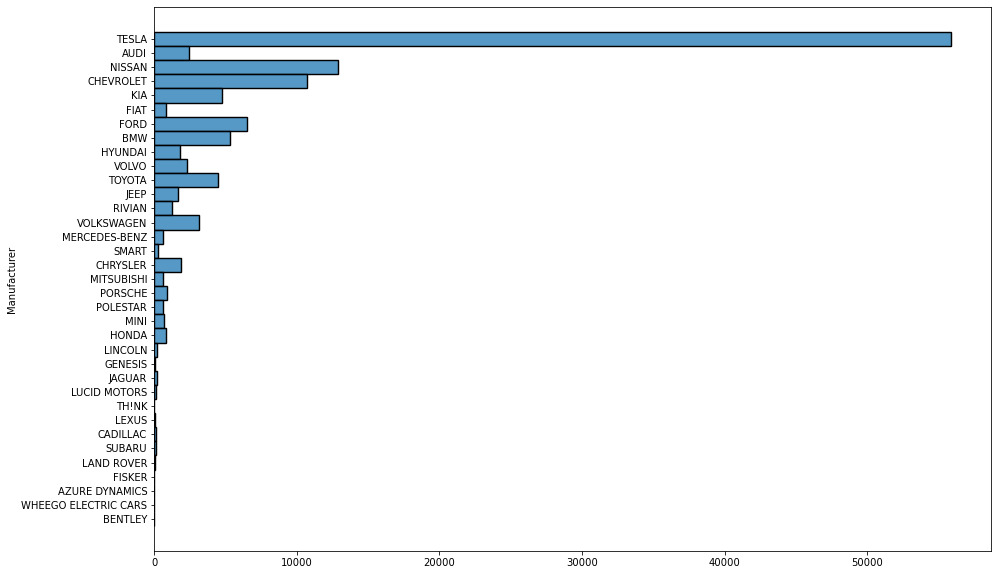

In [13]:
plt.figure(figsize=(15,10))
p = sns.histplot(data=nanDropped, y="Make")
p.set(xlabel = None)
p.set(ylabel = 'Manufacturer')
plt.show()


In [14]:
# how depend is

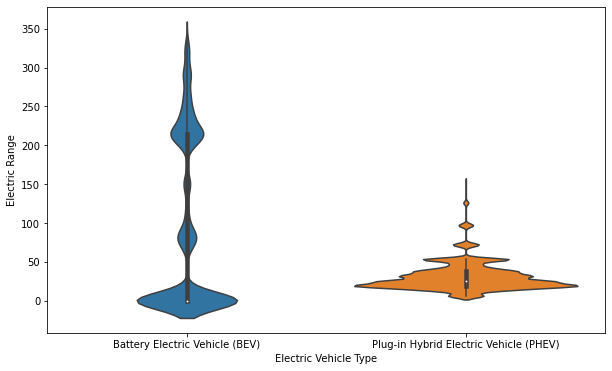

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Electric Vehicle Type',y='Electric Range',data= nanDropped)
plt.show()

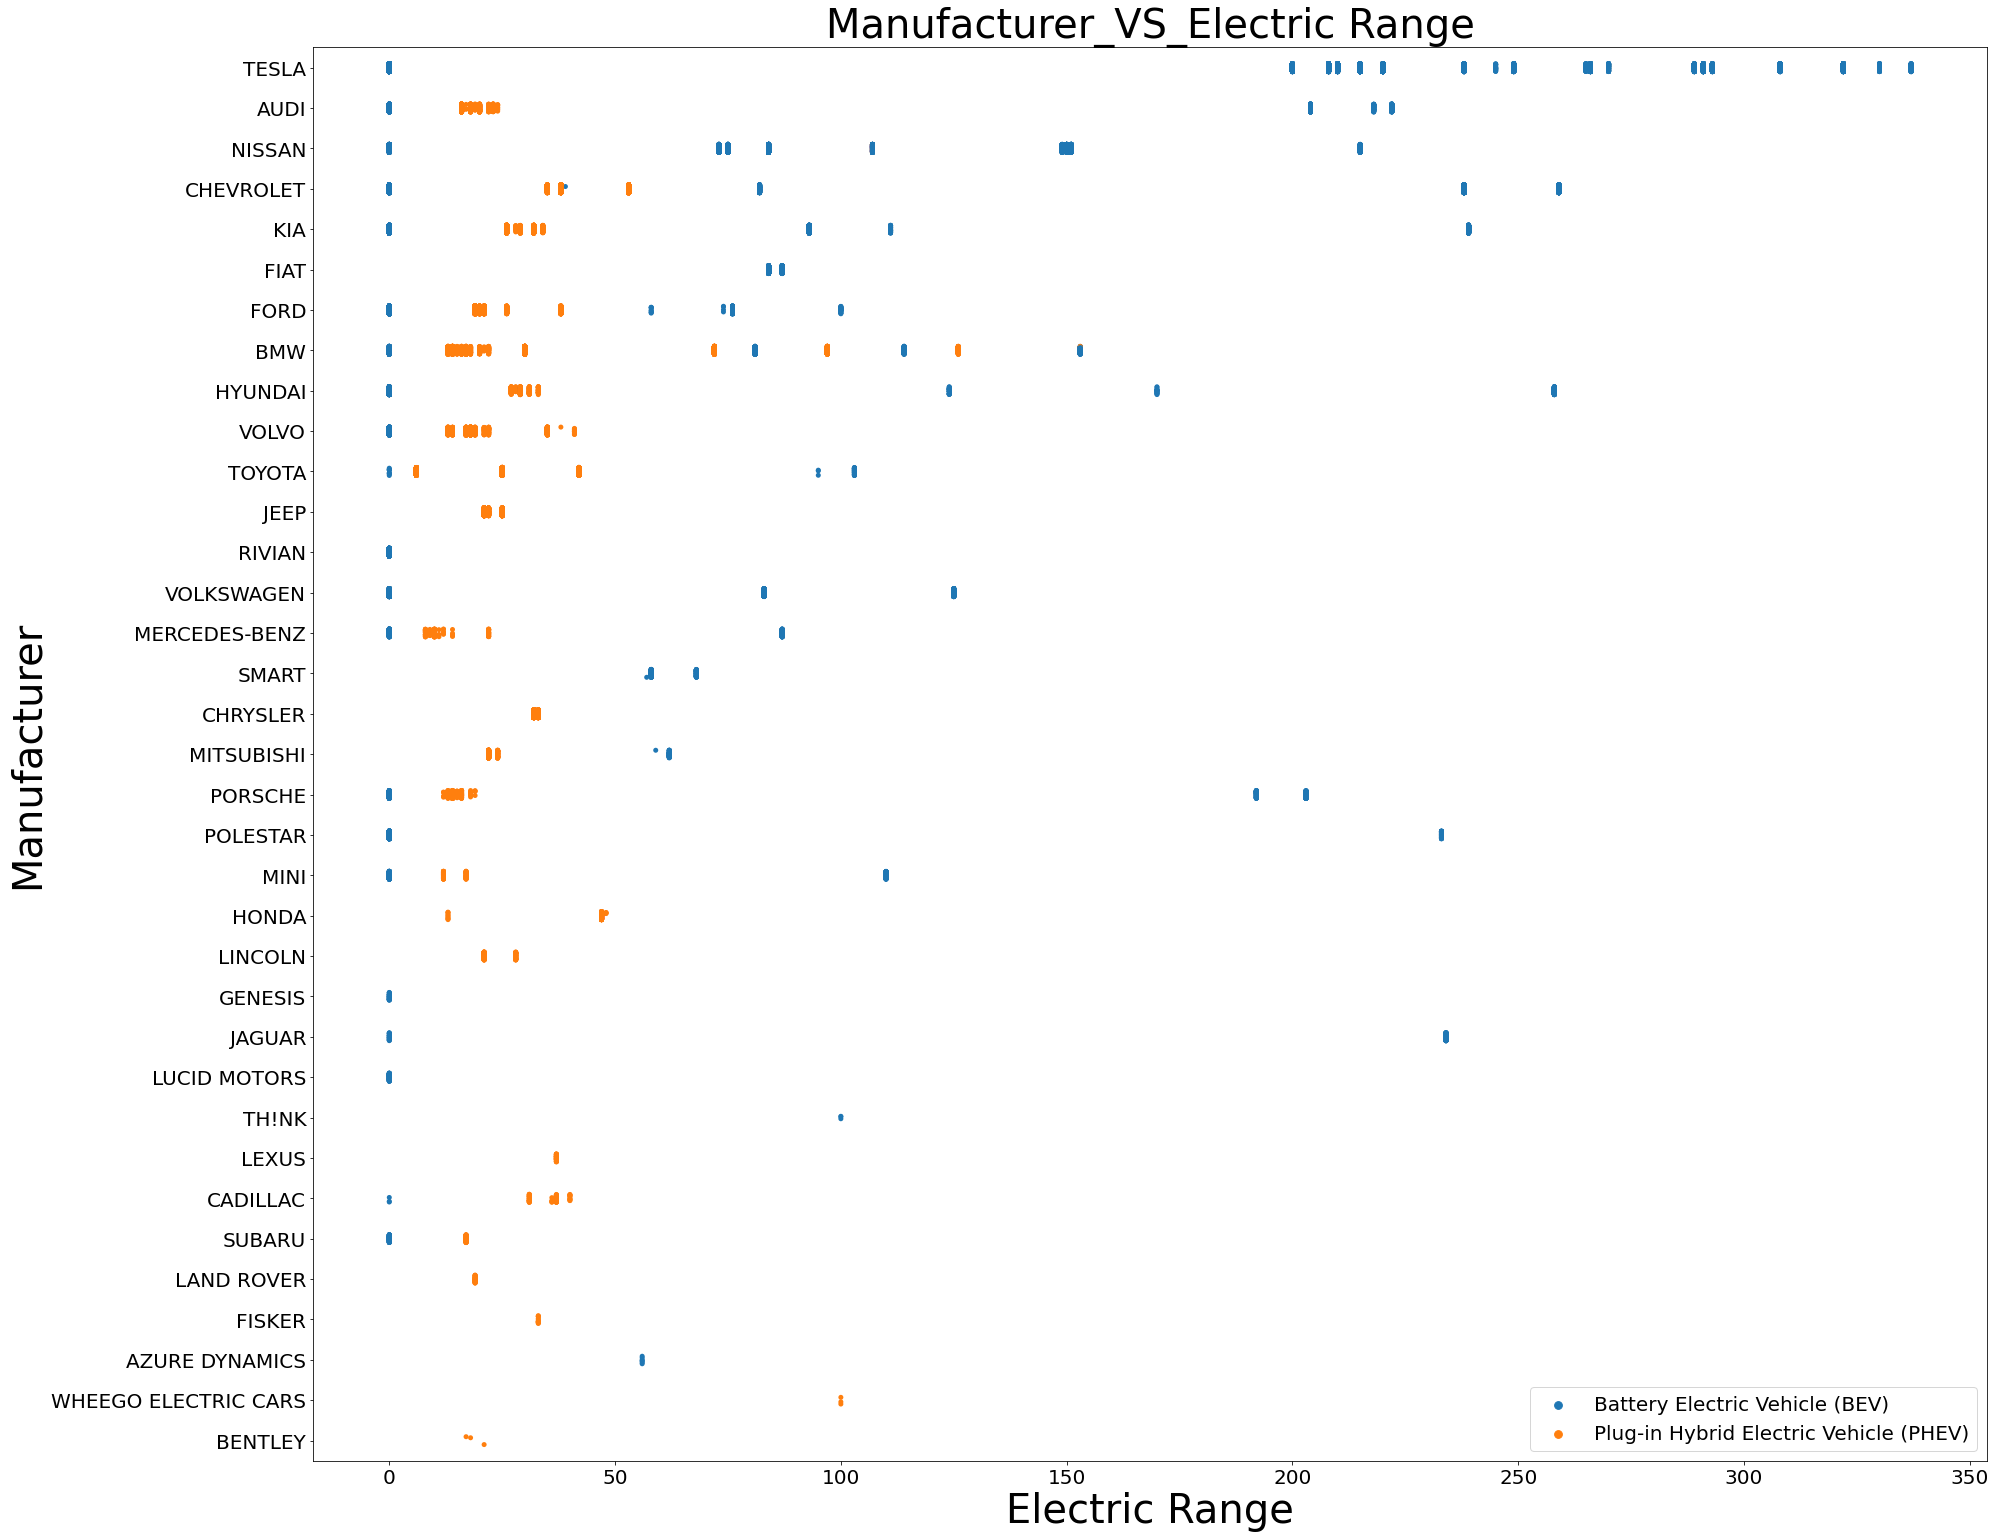

In [16]:
plt.figure(figsize=(30,26))
sns.stripplot(x='Electric Range',y='Make', hue='Electric Vehicle Type', data= nanDropped)
plt.title("Manufacturer_VS_Electric Range",fontsize= 40)
plt.xlabel('Electric Range', fontsize= 40)
plt.ylabel('Manufacturer', fontsize= 40)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

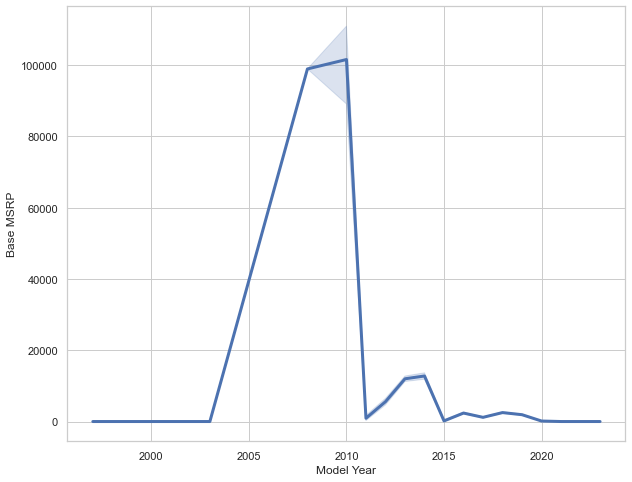

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(x='Model Year',y='Base MSRP',data= nanDropped, palette="tab10", linewidth=3, markers="o")
plt.show()

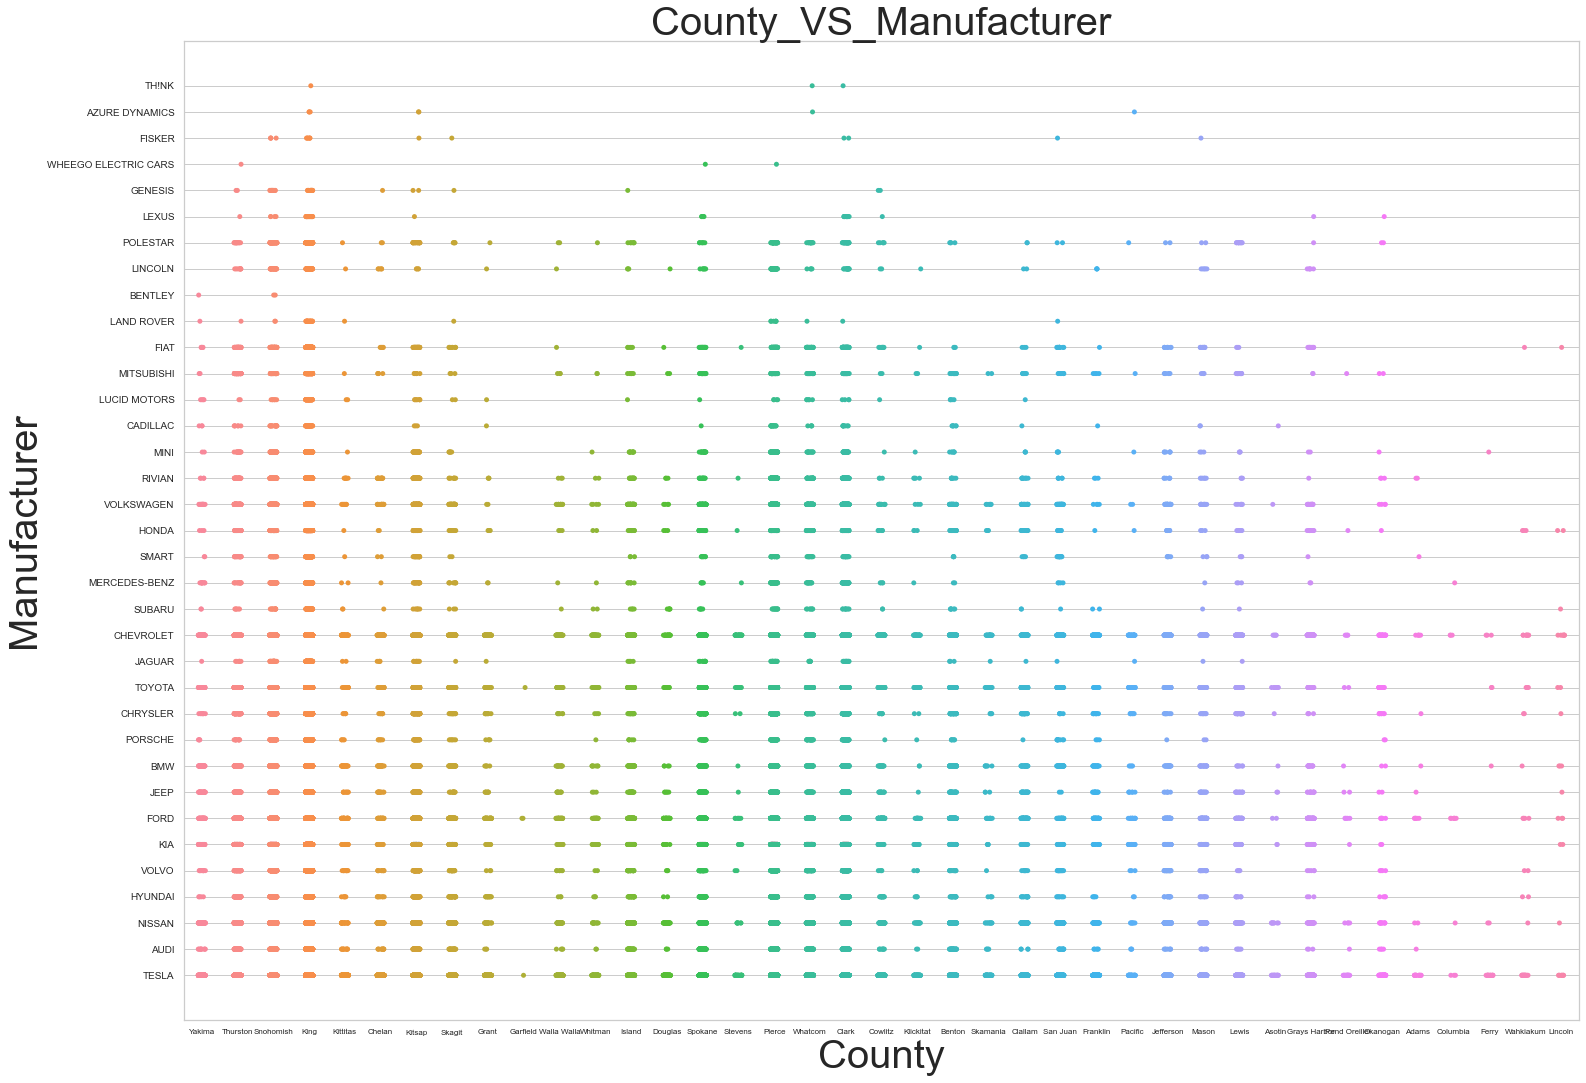

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,18))
sns.stripplot(data=nanDropped, x="County", y="Make")
plt.title("County_VS_Manufacturer",fontsize= 40)
plt.xlabel('County', fontsize= 40)
plt.ylabel('Manufacturer', fontsize= 40)
plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
#plt.legend(fontsize=30)
plt.show()

No handles with labels found to put in legend.


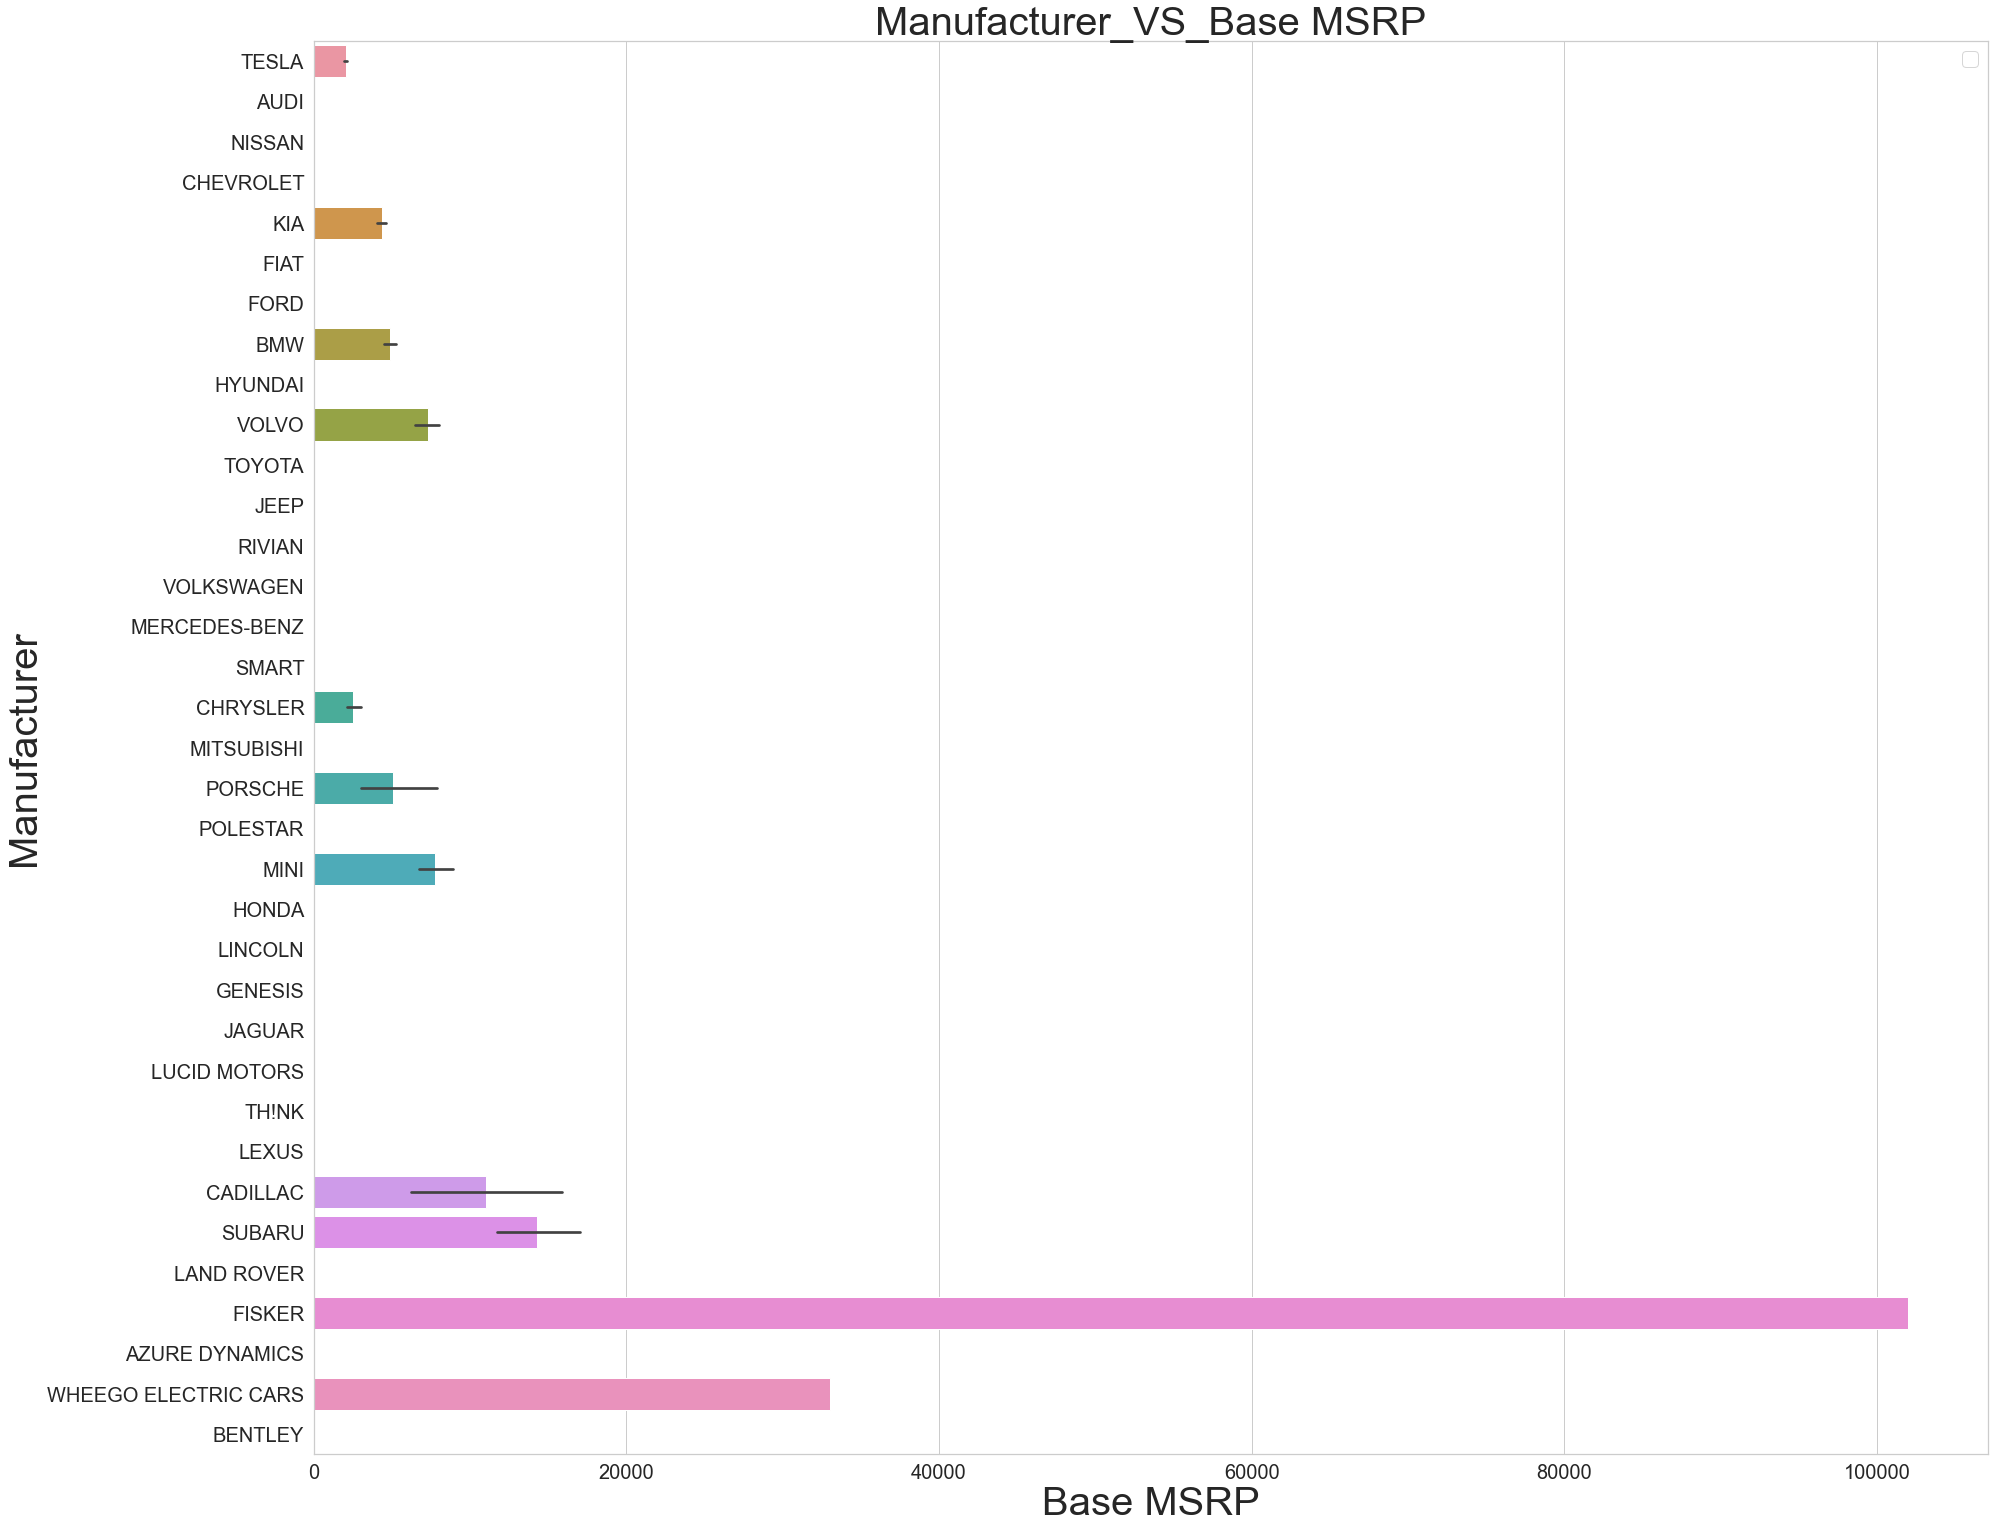

In [19]:
plt.figure(figsize=(30,26))
sns.barplot(x='Base MSRP',y='Make', data= nanDropped)
plt.title("Manufacturer_VS_Base MSRP",fontsize= 40)
plt.xlabel('Base MSRP', fontsize= 40)
plt.ylabel('Manufacturer', fontsize= 40)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

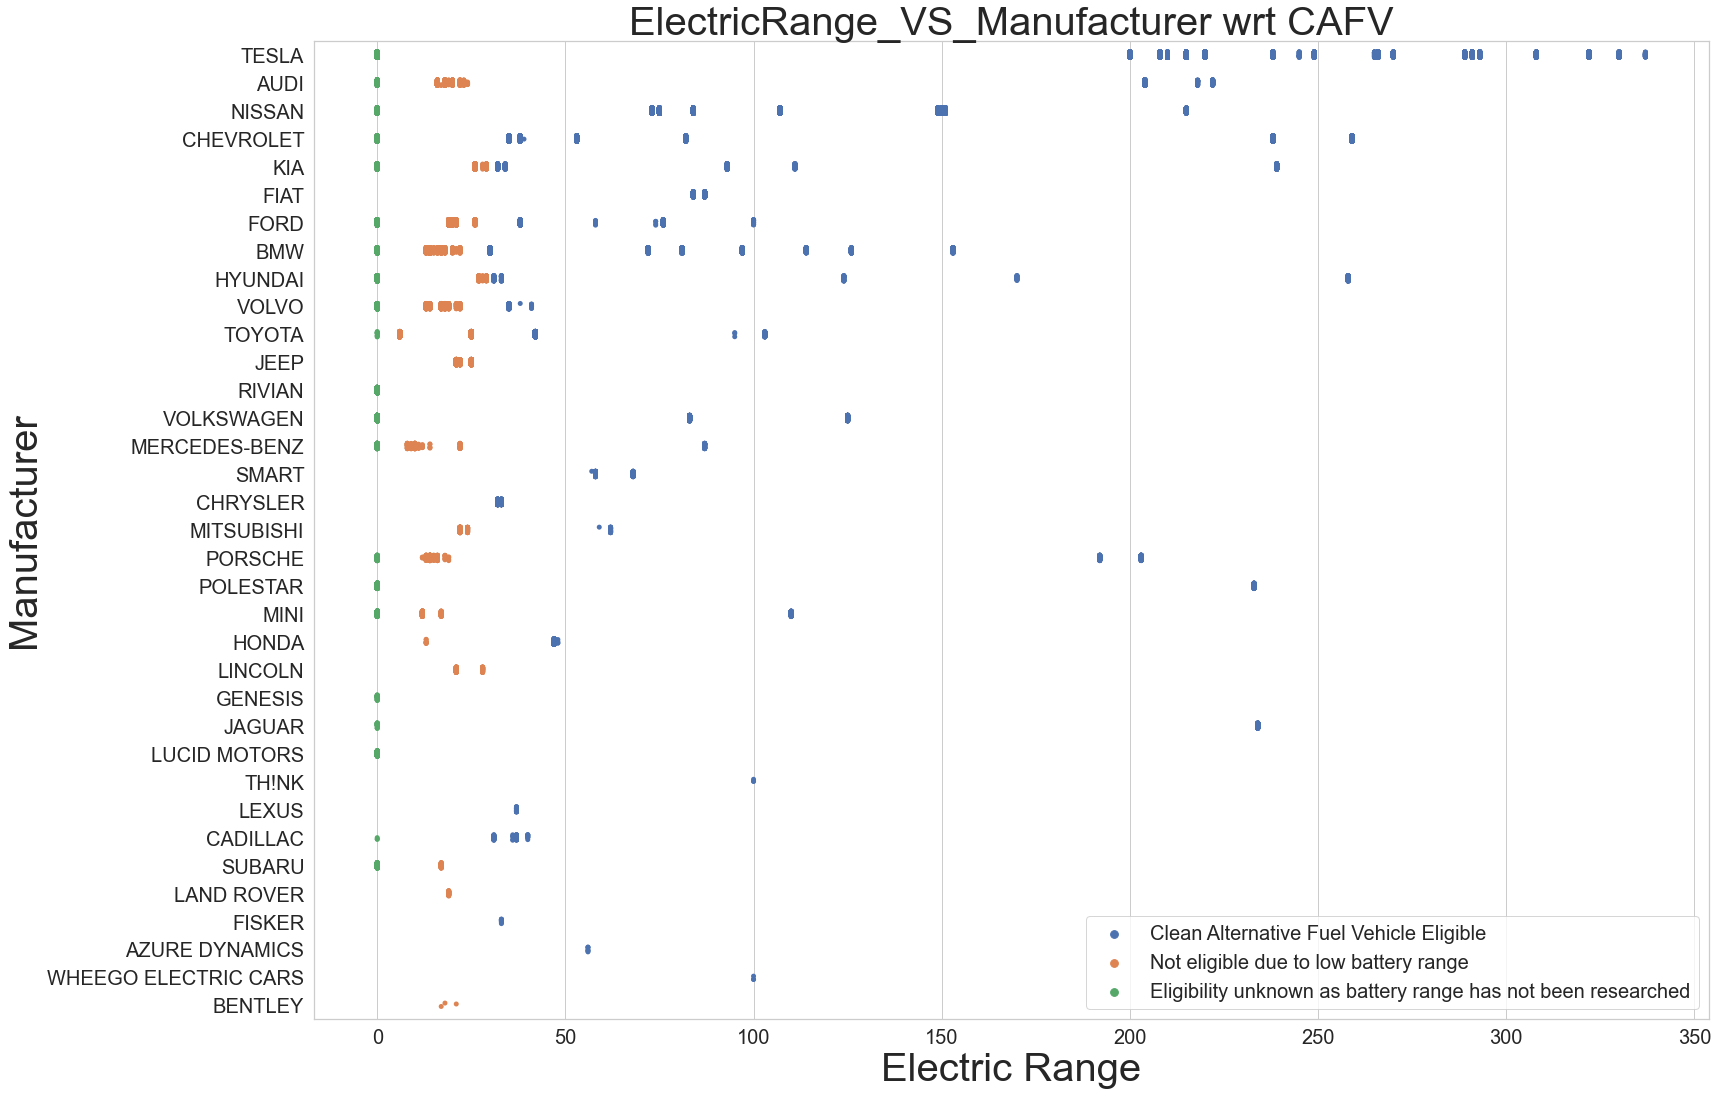

In [20]:
plt.figure(figsize=(25,18))
sns.stripplot(data=nanDropped, x="Electric Range", y="Make", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.title("ElectricRange_VS_Manufacturer wrt CAFV",fontsize= 40)
plt.xlabel('Electric Range', fontsize= 40)
plt.ylabel('Manufacturer', fontsize= 40)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)

In [21]:
#sb.pairplot(df,hue='RapidCharge')

# DATA PREPROCESSING

# 1. Data Cleaning

-----> Remove duplicated Values

In [22]:
dupDataset = nanDropped.duplicated(keep='first')
droppedDup = nanDropped[~dupDataset]


In [23]:
droppedDup.shape

(121378, 17)

----->Enconding

In [24]:
cleanDataset = droppedDup[['County', 'City', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility','Electric Range']]

In [25]:
# select feature and rearrangfeatures
cat_cols = ['County', 'City','Make', 'Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility']
categoricalVariable = cleanDataset[cat_cols]

In [26]:
encoder = OneHotEncoder(handle_unknown="ignore")
#labelEncoder = LabelEncoder()
# Encode the categorical columns and create a new dataframe
encoded_df = pd.DataFrame(encoder.fit_transform(categoricalVariable).toarray(),columns=encoder.get_feature_names(cat_cols))

# Concatenate the original dataframe with the encoded dataframe
            
df_encoded = pd.concat([cleanDataset, encoded_df], axis=1)

# Drop the original categorical columns
df_encoded.drop(columns=cat_cols, inplace=True)

data_encode =df_encoded.fillna(0)

In [27]:
targetVariable= data_encode['Electric Range']

-----> Treat multicolinarity

<AxesSubplot:>

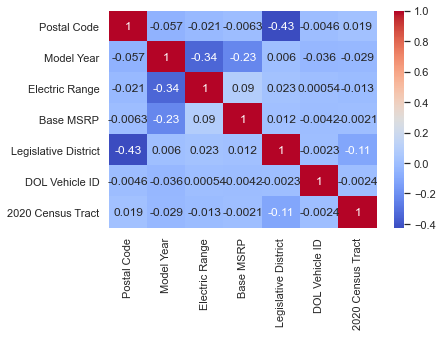

In [28]:
"""import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Add a constant term for intercept
X = sm.add_constant(data_encode)

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF dataframe
print(vif)"""
sns.heatmap(droppedDup.corr(), cmap='coolwarm', annot=True)

# 2. Data Transformation

-----> Treat Outlier/ rescaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
class RescaleData(BaseEstimator, TransformerMixin):
    def __init__(self, scaler='standard'):
        self.scaler = scaler
        if scaler == 'standard':
            self.scaler_ = StandardScaler()
        elif scaler == 'minmax':
            self.scaler_ = MinMaxScaler()
        else:
            raise ValueError('Invalid scaler type specified.')
    
    def fit(self, X, y=None):
        self.scaler_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.scaler_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.scaler_.fit_transform(X)

In [30]:
from sklearn.preprocessing import Normalizer,StandardScaler

class NormalizeData(BaseEstimator, TransformerMixin):
    def __init__(self, norm='l2'):
        self.norm = norm
        self.normalizer_ = Normalizer(norm=self.norm)
    
    def fit(self, X, y=None):
        self.normalizer_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.normalizer_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.normalizer_.fit_transform(X)

# 3. FeatureSelection

In [31]:
from sklearn.feature_selection import SelectKBest,chi2, RFE,mutual_info_classif

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y=None):
        from sklearn.feature_selection import SelectKBest, f_regression
        self.selector = SelectKBest(f_regression, k=self.k)
        self.selector.fit(X, y)
        return self
        
    def transform(self, X):
        return self.selector.transform(X)
    
    def get_support(self, indices=False):
        return self.selector.get_support(indices=indices)

In [32]:
from sklearn.pipeline import Pipeline
rescale  = RescaleData(scaler='standard')
normalize = NormalizeData(norm='l2')
featureSelect = FeatureSelection(k=10)
pipeline = Pipeline(steps=[('rescale', rescale), ('normalize', normalize),('featureSelect', featureSelect)])
processedData = pipeline.fit_transform(data_encode,targetVariable )


# MODEL BUILDING

In [34]:
models=[]
ResultsTest=[]
ResultsTrain=[]
predicts=[]
names=[]
co_effic=[]
intercept=[]
models.append(('LR',LinearRegression()))
models.append(('EN',ElasticNet()))
models.append(('LS',Lasso()))
models.append(('RG',Ridge()))
#models.append(('SVR',SVR(kernel = 'rbf')))

for name, model in models:
    X_train,X_test, Y_train,Y_test = train_test_split(processedData, targetVariable,test_size =0.3,random_state=42 )
    model.fit(X_train,Y_train)
    resultTrain = model.score(X_train,Y_train)
    resultTest = model.score(X_test,Y_test)
    Predict_Y = model.predict(X_test)
    MeanSqE = mean_squared_error(Y_test,Predict_Y)
    coefficient=model.coef_ # for each features
    _intercept=model.intercept_ # for the algorithm
    ResultsTrain.append(resultTrain)
    ResultsTest.append(resultTest)
    predicts.append(MeanSqE)
    names.append(name)
    co_effic.append(coefficient)
    msg=(name,resultTest,resultTrain,MeanSqE,_intercept)
    print(msg)
print('\n\n\n\n',models[0],coefficient)

('LR', 0.8026102096718601, 0.7980695138828807, 2004.5973299780926, 81.31283612893414)
('EN', 0.01065645130767301, 0.010652739034493486, 10047.305044717708, 81.02030172014298)
('LS', 0.7737748147587535, 0.7705859673380593, 2297.435959349882, 81.3085155049776)
('RG', 0.8025694255902676, 0.7980378094546757, 2005.0115138167318, 81.29796503446778)




 ('LR', LinearRegression()) [  -7.29828727   83.51300221   21.11962078   -3.37021132 1469.71975672
   30.33641908   85.03148472  -31.2255033    30.33641908   85.03148472]


The best model to use is Model using Linear Regression ALgorithm since the error is less when compared withe the other four

so in LinearRegression the model equation is y = (-7.29828727*featureSelect1 + 83.51300221*featureSelect2 
                                                 +21.11962078*featureSelect3 - 3.37021132*featureSelect4
                                                 +1469.71975672*featureSelect5 + 30.33641908*featureSelect6
                                                 +85.03148472*featureSelect7 - 31.2255033*featureSelect8
                                                 +30.33641908*featureSelect9 - 85.03148472*featureSelect5) + 81.31283612893415